# Multiple Linear Reg

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [7]:
import pandas as pd
import statsmodels.api as sm

In [8]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
X = df.drop('quality', axis=1)
y = df['quality'].values.reshape(-1, 1)

In [10]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.108e+04
Date:                Fri, 14 Aug 2020   Prob (F-statistic):                        0.00
Time:                        21:27:19   Log-Likelihood:                         -1569.7
No. Observations:                1599   AIC:                                      3161.
Df Residuals:                    1588   BIC:                                      3221.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0042      0.016      0.255      0.799      -0.028       0.036
volatile acidity        -1.0997      0.120     -9.157      0.000      -1.335      -0.864
citric acid             -0.1841      0.147     -1.251      0.211      -0.473       0.105
residual sugar           0.0071      0.012      0.587      0.557      -0.017       0.031
chlorides               -1.9114      0.418     -4.575      0.000      -2.731      -1.092
free sulfur dioxide      0.0045      0.002      2.102      0.036       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.565      0.000      -0.005      -0.002
density                  4.5291      0.625      7.243      0.000       3.303       5.756
pH                      -0.5229      0.160     -3.268      0.001      -0.837      -0.209
sulphates                0.8871      0.111      8.006      0.000       0.670       1.104
alcohol                  0.2970      0.017     17.217      0.000       0.263       0.331
==============================================================================
Omnibus:                       25.388   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.530
Skew:                          -0.159   Prob(JB):                     7.09e-09
Kurtosis:                       3.680   Cond. No.                     2.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# KNN

In [11]:
y = df['quality'].apply(lambda x: 1 if x>=7 else 0)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 0])

In [15]:
knn.score(X_test, y_test)

0.859375

# XG Boost

In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [17]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [21]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [22]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[21:27:43] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:43] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [23]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.342961


In [24]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [25]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[21:27:47] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:47] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:47] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [26]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.471183,0.001065,0.471616,0.000862
1,0.445410,0.001664,0.446573,0.001425
2,0.423983,0.001423,0.426443,0.003405
3,0.405368,0.002633,0.408882,0.004108
4,0.389507,0.003789,0.393516,0.003810


In [27]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.294413
Name: test-rmse-mean, dtype: float64


In [28]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[21:27:52] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:52] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


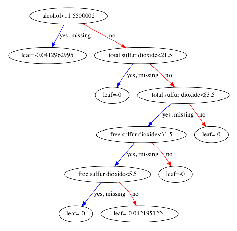

In [29]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 20]
plt.show()

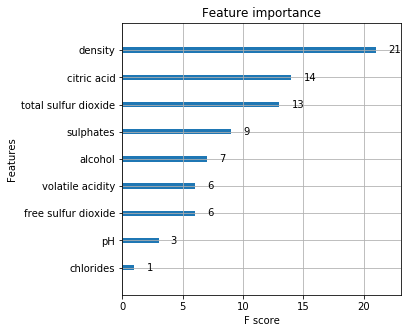

In [33]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

In [44]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [47]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
# fit model on all training data
model = MyXGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 88.26%
Thresh=0.040, n=11, Accuracy: 88.26%
Thresh=0.050, n=10, Accuracy: 89.20%
Thresh=0.066, n=9, Accuracy: 88.26%
Thresh=0.069, n=8, Accuracy: 88.83%
Thresh=0.072, n=7, Accuracy: 88.83%
Thresh=0.075, n=6, Accuracy: 89.58%
Thresh=0.085, n=5, Accuracy: 89.02%
Thresh=0.085, n=4, Accuracy: 87.12%
Thresh=0.099, n=3, Accuracy: 87.69%
Thresh=0.116, n=2, Accuracy: 83.33%
Thresh=0.243, n=1, Accuracy: 84.09%
